# Avance II Proyecto Final 
### Equipo #3
### Grupo: 006 
### Frecuencia : Lunes, Miercoles,Viernes  6-7 pm
### Integrantes : 
* Francisco Ramon Ramirez Torres 1739900. 
* Cesar Gerardo Varela Cavazos 1748727. 
* Cesar Alejandro Barrera Martinez 1618509 



## Titulo: Video Games Sales. (Información histórica de ventas de videojuegos)

## Descripcion de la Base de Datos:

 Esta base de datos contiene toda la historia de los videojuegos lanzados en su respectivo, año fundada en una empresa en particular, con su respectiva plataforma y las ventas que ha tenido en el Norte de America, EE.UU, Japon, etc; al igual que las ventas globales que ha tenido.

## Descripcion de las columnas: 
* Contiene nombre, genero, año de publicacion, plataforma, empresa desarrolladora, ventas en Estados Unidos,Norteamerica, Japon y categoria.
* Los tipos de datos que contiene la base de datos son String, flotantes, Caracter, contando con aproximadamente 10 mil registros de los videojuegos.

## Justificacion del uso de los datos.
* a). Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.
    La diversa información acerca de los videojuegos, como la distribución de venta, popularidad de videojuegos, diversa variedad con géneros en los títulos de videojuegos y competencia entre empresas que tienen juegos similares en popularidad.

* b) Qué beneficio encuentran de trabajar con estos datos.
  Poder encontrar algún beneficio de manera que podemos calcular un precio estimado de un videojuego, ver un análisis de ventas sobre cómo se han visto ventas con otras empresas, podemos ver qué clase de videojuegos se han vendido más a través de los años según su aceptación para las empresas que se dedican a crear juegos puedan saber que genero es el que deben crear más.

## Preguntas de Interes
¿Cuál es la percepción de aceptación de videojuegos de las empresas ?

¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

¿Cómo se puede aplicar una red neuronal con de tipo clasificación con la base de datos?

### 1. Limpieza de datos


In [4]:
import numpy as np
import pandas as pd
import json
import seaborn as sn
import pandas_profiling 
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Franc\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* importacion de librerias 

In [11]:
games = pd.read_csv("train.csv")

* Con esta variable games la usaremos para abrir nuestra BD de los videojuegos

###### a)	Mostrar los datos sin manipulación

In [12]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN


* Usamos la funcion head() para mostrar los primeros 5 registros solo para revisar si cargo correctamente

In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,87.0,89.0,6.3,1454.0,Treyarch,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,0.22,83.0,91.0,7.8,543.0,Insomniac Games,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,0.01,37.0,31.0,NaN,NaN,10tacle Studios,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
11702,NHL 2K9,PS3,2008.0,Sports,Take-Two Interactive,0.11,0.01,0.00,0.01,70.0,21.0,NaN,NaN,Visual Concepts,E10+


* Usamos la funcion tail() para mostrar los primeros 5 registros solo para revisar si cargo correctamente
* Como se ve con la fucion head() y tail() se muestran registros con alguno de los registros de videojuegos contando con nombres, ventas, puntuaciones, genero

In [16]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

###### b)	Eliminar columnas no deseadas.

In [22]:
games2 = games.drop_duplicates(['Name','Platform','Publisher'])

In [23]:
nuevaBD = games2.drop(['User_Count', 'User_Score', 'Critic_Count','Critic_Score','Developer','Other_Sales'], axis=1)

In [24]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,NaN
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,NaN


* Eliminamos algunas columnas que no nos ayudan tanto ya que muchos datos eran vacios o NaN y no nos serviria hacer analisis de datos vacios. Esto nos complicaria mas hacer analisis y agregar valores para los datos de columnas faltantes lo que es mejor eliminarlas para evitar problemas y no utilizar valores falsos o inventados y puedan afectar estadisticas.

###### c)	Correcta manipulación de los datos nulos dentro de la base de datos.

In [20]:
nuevaBD = nuevaBD.fillna('E')

In [23]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Rating
0,Rapala Trophies,PSP,2006,Sports,Activision,0.04,0.00,0.00,E
1,New Super Mario Bros. U,WiiU,2012,Platform,Nintendo,2.30,1.34,1.27,E
2,Robots,PS2,2005,Action,Vivendi Games,0.18,0.14,0.00,E
3,Hamster Club 3,GBA,2002,Simulation,Jorudan,0.00,0.00,0.35,E
4,Formula 1 06,PS2,2006,Racing,Sony Computer Entertainment,0.00,0.00,0.04,E
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,M
11699,Resistance 3,PS3,2011,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,M
11700,Ready 2 Rumble Revolution,Wii,2009,Sports,Atari,0.15,0.00,0.00,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011,Role-Playing,Capcom,0.00,0.00,0.03,E


In [21]:
Videojuegos = nuevaBD

Videojuegos.to_csv('Videojuegos.csv', index=False)

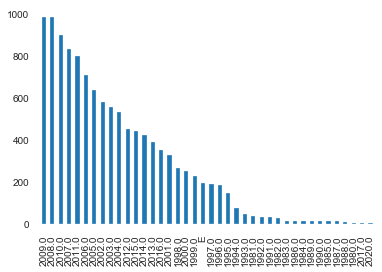